In [1]:
import os
import skimage.io as io
import skimage.transform as trans
import random
import h5py
import re
import matplotlib
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot
%matplotlib inline
from keras import metrics
from keras import backend as K
from keras.initializers import *
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from importlib import reload
from keras.callbacks import EarlyStopping, TensorBoard
from keras.models import load_model
from keras.models import save_model

Using TensorFlow backend.


In [2]:
def sorensen_dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    coef = (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())
    return coef

def sorensen_dice_coef_loss(y_true, y_pred):
    return 1 - sorensen_dice_coef(y_true, y_pred)

In [2]:
model = load_model('./models/1e-5_subset_2/model')

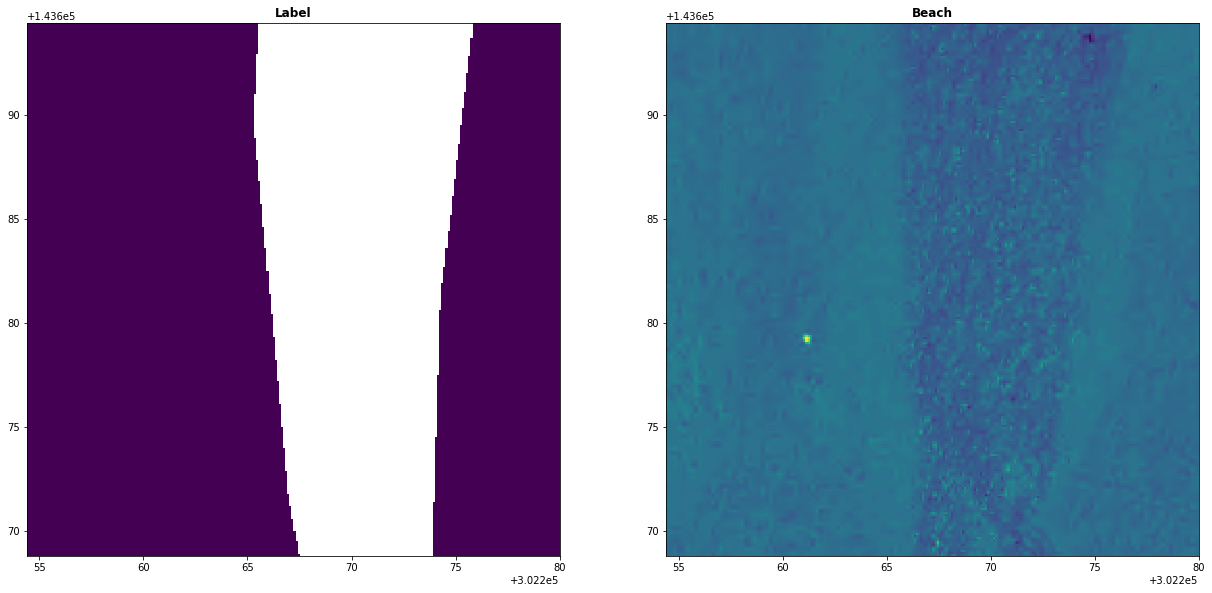

In [26]:
no = 8005
image_r = rasterio.open("/home/paperspace/ciaran/data/train_normalised/blue_anchor_"+str(no)+".tif")
label_r = rasterio.open("/home/paperspace/ciaran/data/label/blue_anchor_"+str(no)+".tif")
image = io.imread("/home/paperspace/ciaran/data/train_normalised/blue_anchor_"+str(no)+".tif")
label = io.imread("/home/paperspace/ciaran/data/label/blue_anchor_"+str(no)+".tif")
fig, (axl, axb) = pyplot.subplots(1, 2, figsize=(21,21))
show(label_r, ax=axl, title="Label")
show(image_r, ax=axb, title="Beach")
pyplot.show()

In [4]:
image.shape

(256, 256, 4)

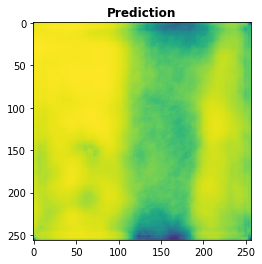

(256, 256, 1)

In [28]:
stuff = model.predict(x=np.array([image]))
show(stuff[0], title="Prediction")
stuff[0].shape